# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [145]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов
import copy

## Реализация базовой модели()

In [146]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [147]:
random.seed()
model = Model(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=2,
              consumer_max=7,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=7,
              seller_delta=0.1)
model.run(10000)

100%|██████████| 10001/10001 [00:00<00:00, 136097.32it/s]


## Визуализация модели

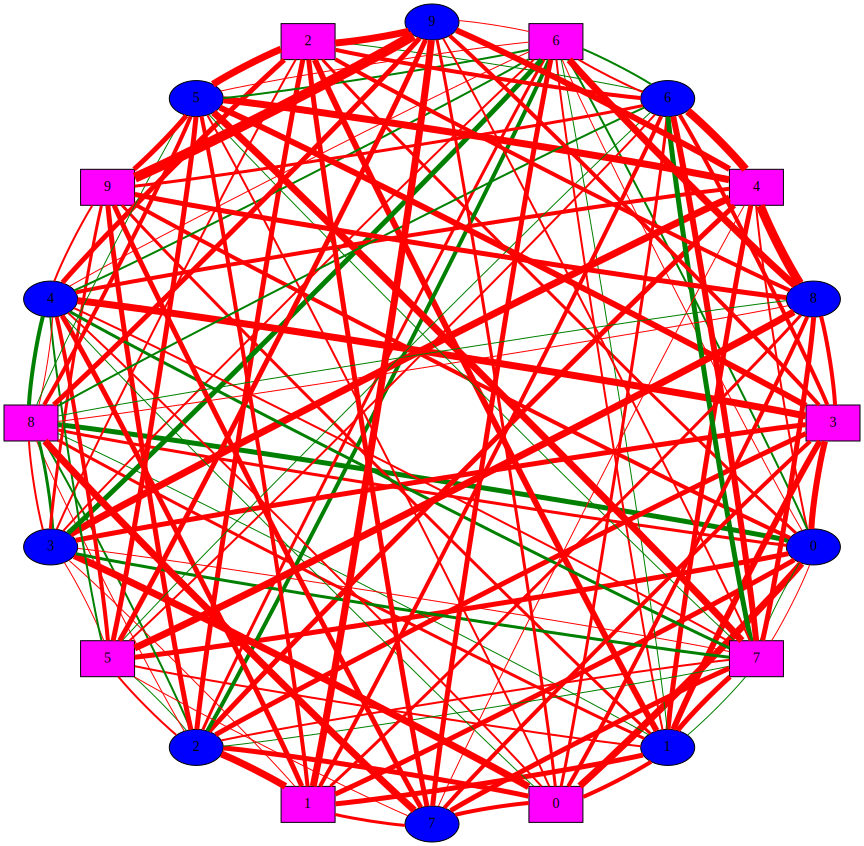

In [148]:
model.plot_graph(100, 1000)

## Результаты моделирования

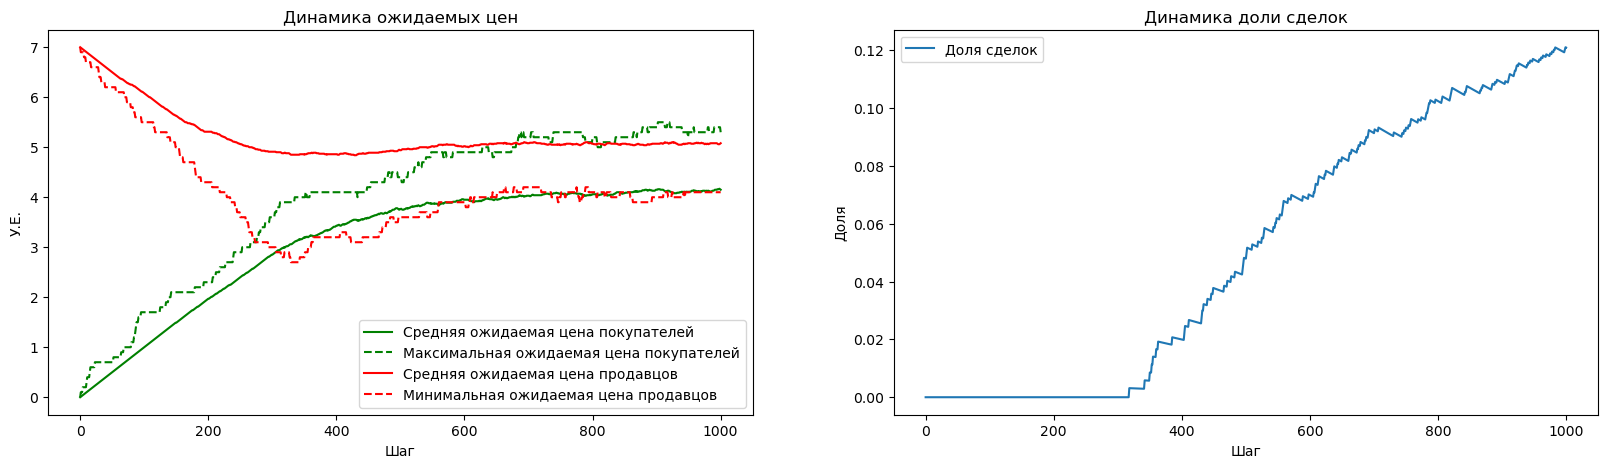

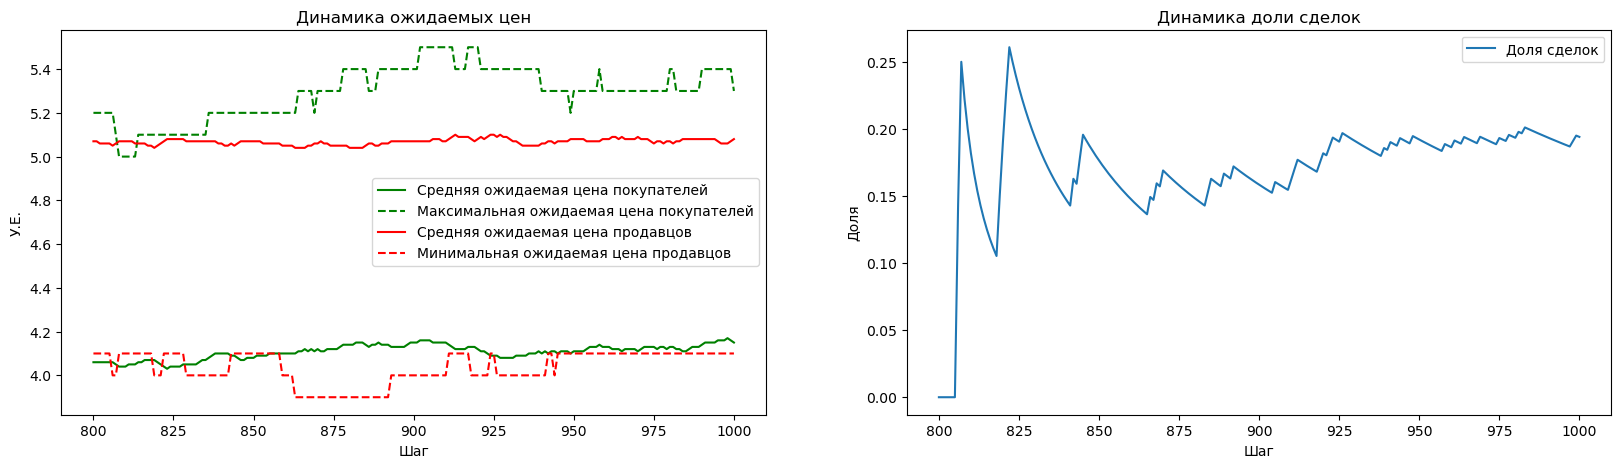

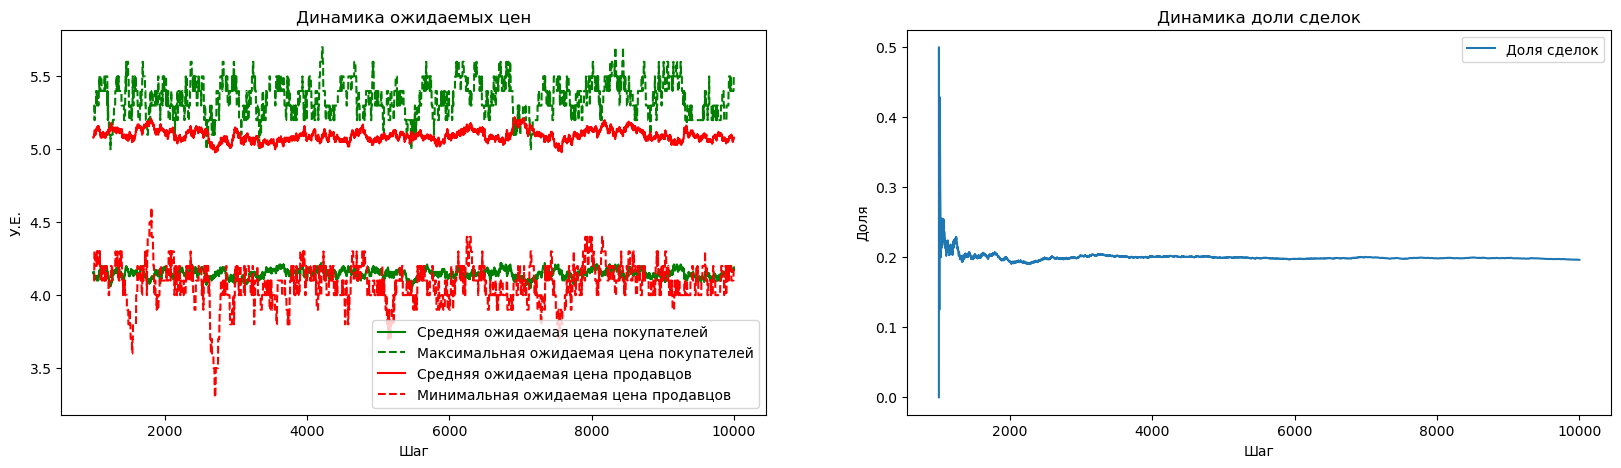

In [149]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(800, 1000)
model.plot_dynamics(1000, 10000)



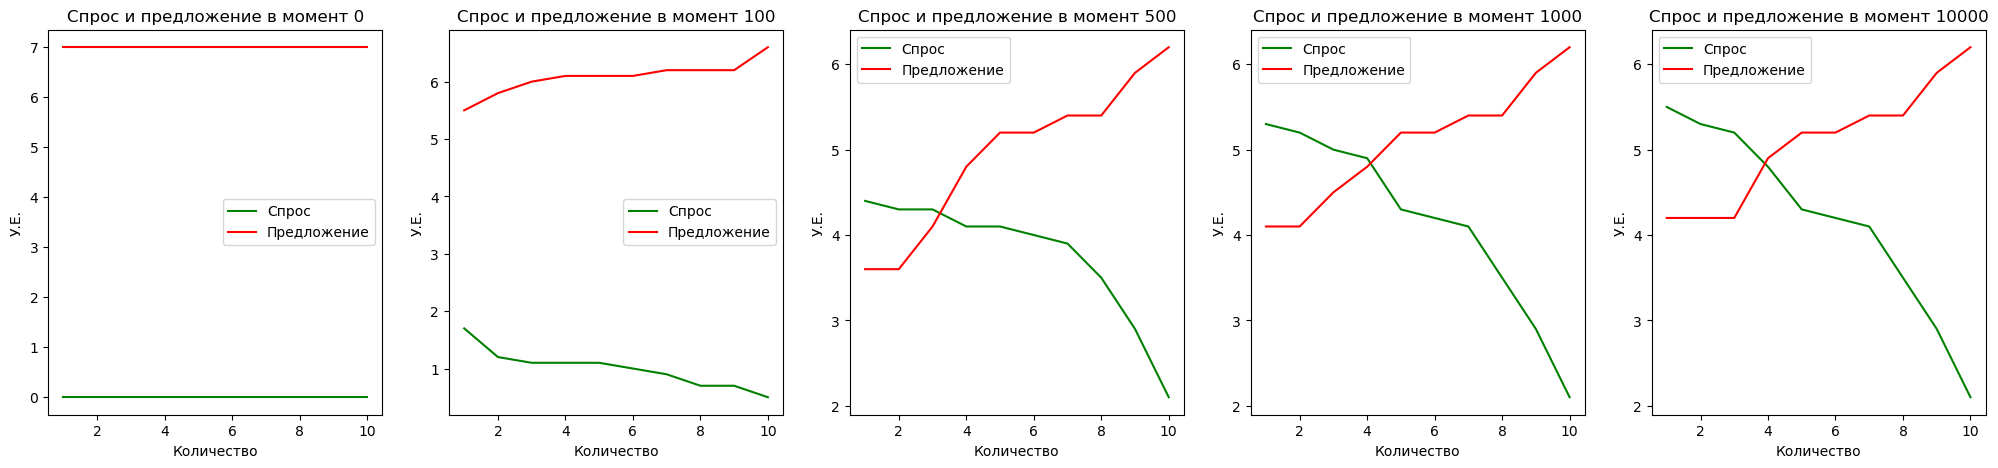

In [150]:
model.plot_supply_and_demand([0, 100, 500, 1000, 10000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень. 
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

1. Даже не проводя запусков понятно, что ожидаемые цены будут лежать в отрезках от $(s_{min}, c_{max})$. При маленьком числе покупателей и продавцов, мы на практике получаем почти любые числа из данного отрезка. Интереснее ситуация при большем кол-ве покупателей и продавцов, где распределение цен близко к нормальному: Здесь средние ожидаемые цены покупателей и продавцов лежат в окрестности точки $\frac{s_{min} + s_{max}}{2}$, причем размер окрестности тем больше, чем меньше пересечение отрезков $(s_{min}, s_{max}), (c_{min}, c_{max})$.

2. При любых входных данных модель приходит к некоторой фиксированной доле сделок. Это происходит из-за того, что агенты адаптируются и приходят к компромиссу в процессе торгов. Важно заметить, что эта фиксированная доля сделок зависит от входных данных, и может быть достаточно малой(но не больше 0.5). , 

3. При росте кол-ва продавцов и покупателей скорость сходимости уменьшается. Это достаточно интуитивно, так как для достижения равновесного состояния необходимо, чтобы все агенты провели некоторое кол-во сделок. Как следствие, рост кол-ва агентов приводит к увеличению кол-ва сделок, необходимых для достижения равновесия. При фиксированных дельтах, кол-во шагов, необходимых для стабилизации модели примерно $O(n^{2})$. Я проверил это для достаточно больших значений n(вплоть до n=1000), так что скорее всего такая зависимость имеет место быть. К тому же это достаточно интуитивный результат, так как при равном кол-ве покупателей и продавцов(n), число уникальных сделок будет равно $n^{2}$.

4. Уменьшение шага цены также уменьшает скорость сходимости. Это происходит из-за увеличения кол-ва возможных состояний модели, как следствие, нужно больше действий, чтобы придти к равновесному состоянию.

5. Сначала ожидания каждой из сторон далеки от равновесных, как следствие в начале сделок почти не происходит. Затем кол-во успешных сделок растет, в какой-то момент доля успешных сделок даже выше, чем равновесная, но впоследствии кол-во сделок становится примерно равновесным, и граф связей практически неизменен(если брать достаточно большие промежутки, разумеется)


## Задание 2 (2 балла)


Модифицируйте базовую модель так, чтобы переговорные позиции покупателей и продавцов были различными.

1. Реализация будет такой: 
    По сравнению с базовой моделью мы добавим новый параметр модели - influence(в данном случае это скорее влияние покупателей), принимающий значения от 0 до 1(в базовой модели он по сути был равен 0.5), который показывает, где на отрезке $[s.expected.price, c.expected.price]$ будет установлена цена. Также, теперь в случае успешной сделки в массив deals_results будет также записана реальная цена данной сделки.
    
Точная формула реальной цены - $influence*s.expected.price + (1 - influence)*c.expected.price$.

In [151]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, influence):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            influence -- параметр отвечающий за реальную цену сделки
            real_prices -- массив, в котором содержится информация о реальных ценах сделок.

        '''
        self.influence = influence
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        #     'real_price': influence*(c.expected_price) + (1 - influence)*(s.expected_price)
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1,
                'real_price': self.influence*self.sellers[seller_id].expect_price + (1 - self.influence)*self.consumers[consumer_id].expect_price
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''
        # Список точек по оси шагов

        steps_range = list(range(start, end+1))

        # Формируем два графика по горизонтали

        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        #Рассчитываем все нужные параметры
        
        deals_sum = [0]
        deals_avg_price = [0]
        for i in range(start, end+1):
            if(len(self.deals_results[i]) == 4):
                deals_avg_price.append((deals_avg_price[-1]*(len(deals_avg_price)-1) + self.deals_results[i]['real_price'])/len(deals_avg_price))
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")
        ax1.axhline(deals_avg_price[-1], color='black', linestyle = '--', label="Средняя цена сделок")
        
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



In [152]:
random.seed()
model = Model(num_of_consumers=20,
              num_of_sellers=10,
              consumer_min=2,
              consumer_max=7,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=7,
              seller_delta=0.1, influence = 0.8)
model.run(10000)

100%|██████████| 10001/10001 [00:00<00:00, 102791.69it/s]


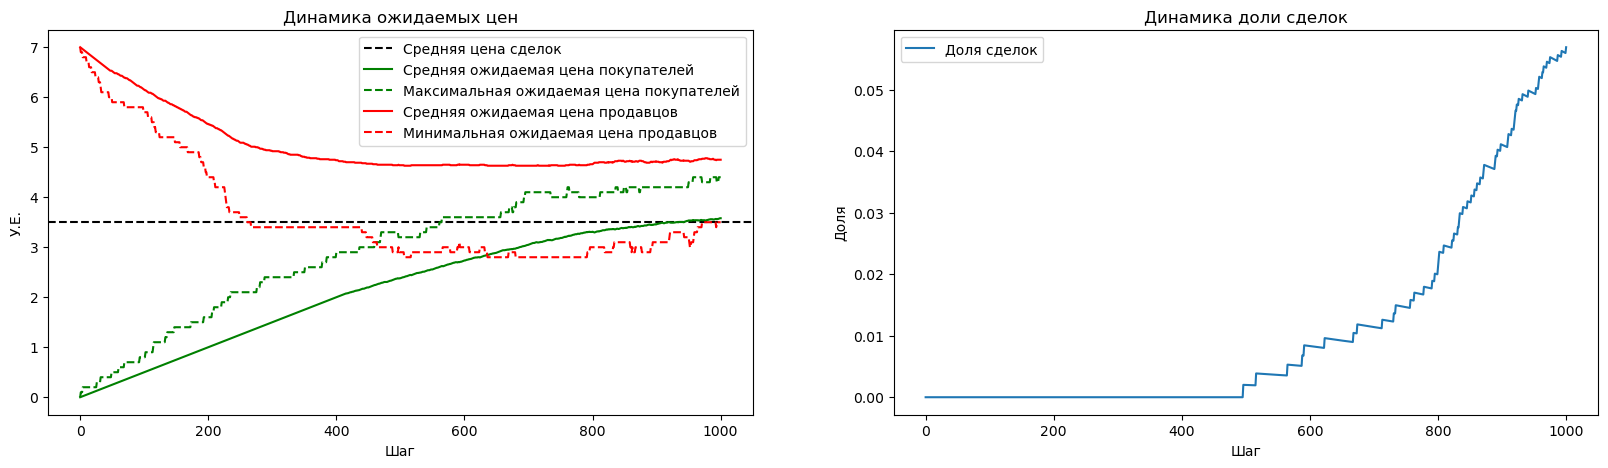

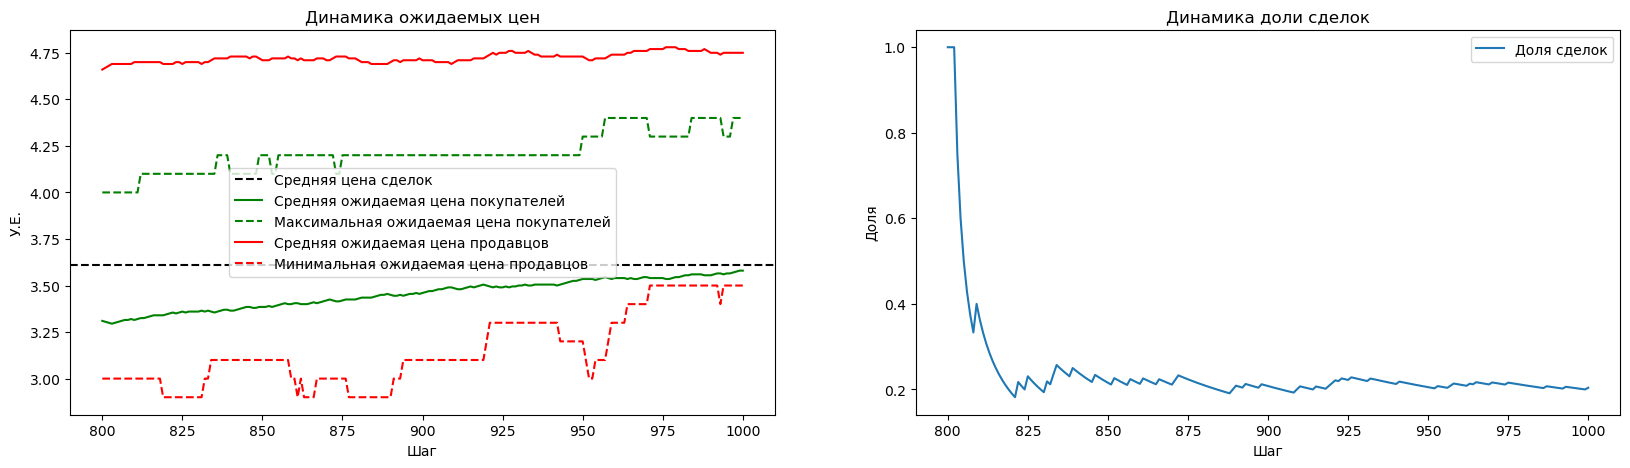

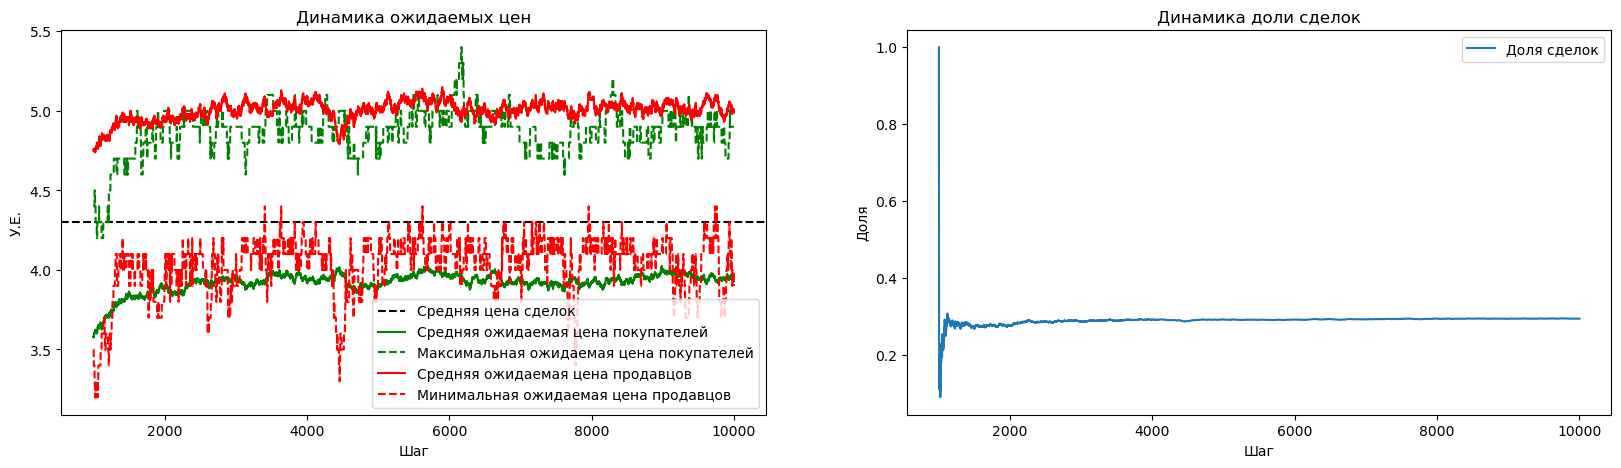

In [153]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(800, 1000)
model.plot_dynamics(1000, 10000)

Как мы видим из графиков, поведение модели не изменилось, в сравнении с базовой, так как реальная цена сделки не влияет на сам факт совершения сделки, а только на то, кто от нее больше выиграет. Фактически, переговорные позиции никак не влияют на суммарный излишек, только на его распределение между агентами(Соотношение между суммарными излишками покупателей и продавцов будет в точности равно $\frac{influence}{1-influence}$), т.е если если кто-то имеют сравненно более сильную переговорную позицию, то он будет забирать практически весь излишек себе. 

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируйте модель так, чтобы каждый агент мог совершить не более одной сделки.

Добавим в параметры модели параметр maxcollections. Теперь, при моделировании дня мы будем заводить счетчик(counter), который считает кол-во произошедших взаимодействий, и в тот момент когда $counter == maxcollections$ мы заканчиваем день. Осталось учесть то, что каждый агент может совершить не более одной сделки в день. Для этого заведем у агентов параметр make_deal, по умолчанию равный единице. Он показывает, сколько сделок агент ещё может совершить. Каждый раз при совершении сделки мы проверяем, что данный параметр не равен 0, и только тогда совершаем сделку. По окончании дня мы итерируемся по всем агентам, и делаем make_deal = 1. 

In [154]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_collections):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            max_collections -- "длительность дня"

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []
        #Учитывая модификацию, взаимодействий не может быть больше, чем число покупателей и продавцов
        self.max_collections = min(max_collections, num_of_sellers, num_of_consumers)


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        if(self.consumers[consumer_id].make_deal == 0 or self.sellers[seller_id].make_deal == 0):
            # Невозможное взаимодействие
            return False
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            #Данные агенты сегодня уже совершили сделку
            self.consumers[consumer_id].deal = 0
            self.sellers[seller_id].deal = 0
        # Взаимодействие случилось
        return True

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            counter = 0
            while(counter != self.max_collections):
                # Выбираем индекс покупателя случайным образом
                consumer_id = random.randrange(0, self.num_of_consumers)
            
                # Выбираем индекс продавца случайным образом
                seller_id = random.randrange(0, self.num_of_sellers)
            
                # Моделируем сделку
                if(self.deal(consumer_id, seller_id)):
                    counter += 1
            #Новый день - Новые сделки
            for i in range(self.num_of_consumers):
                self.consumers[i].deal = 1
            for i in range(self.num_of_sellers):
                self.sellers[i].deal = 1
            

    def plot_dynamics(self, start, ends):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''
        end = ends*self.max_collections
        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, p_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        pos_list = p_list*self.max_collections
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, ends):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        end = ends*self.max_collections
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta, make_deal=1):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        self.make_deal = 1

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta,  make_deal=1):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.make_deal = 1

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



In [155]:
random.seed()
model = Model(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=2,
              consumer_max=7,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=7,
              seller_delta=0.1, max_collections = 5)
model.run(10000)

100%|██████████| 10001/10001 [00:00<00:00, 33387.86it/s]


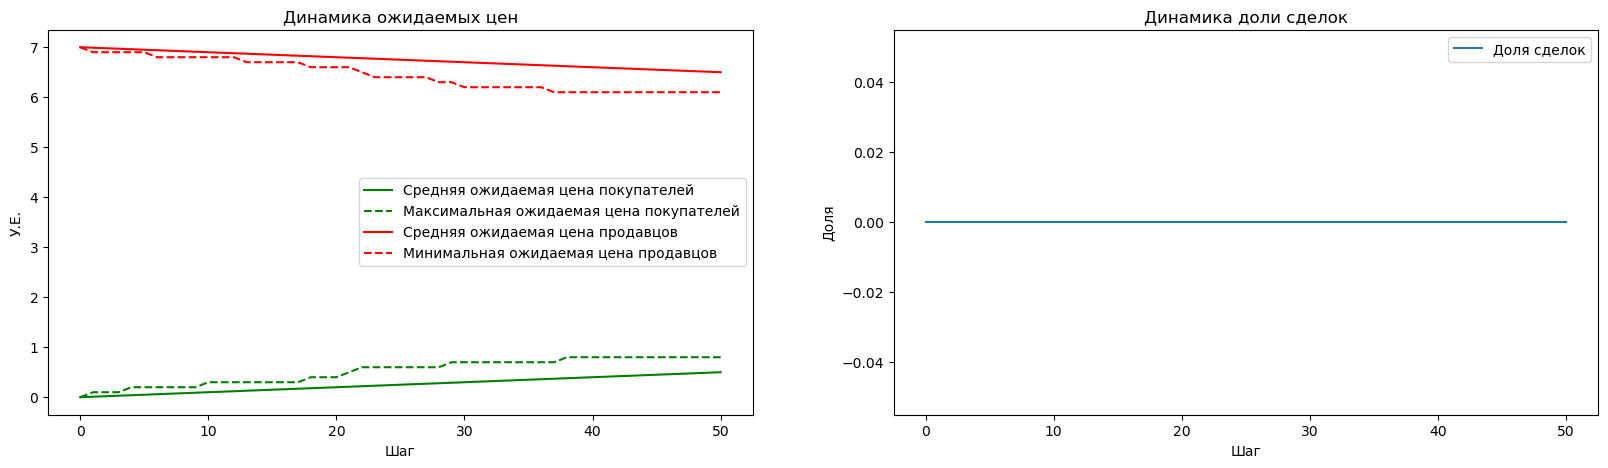

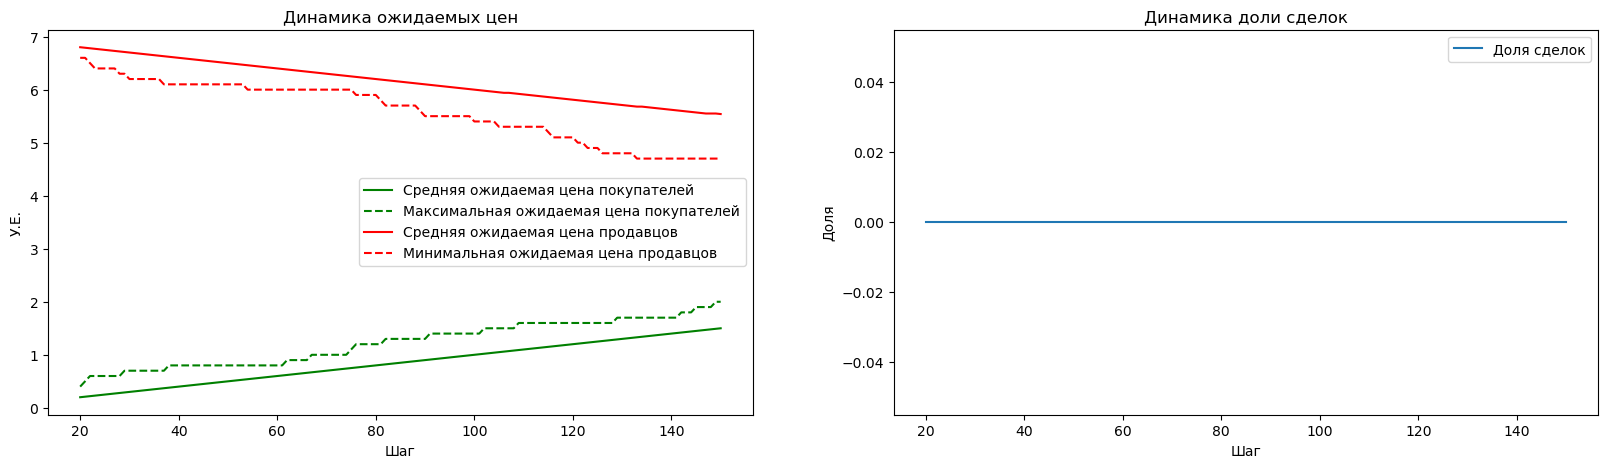

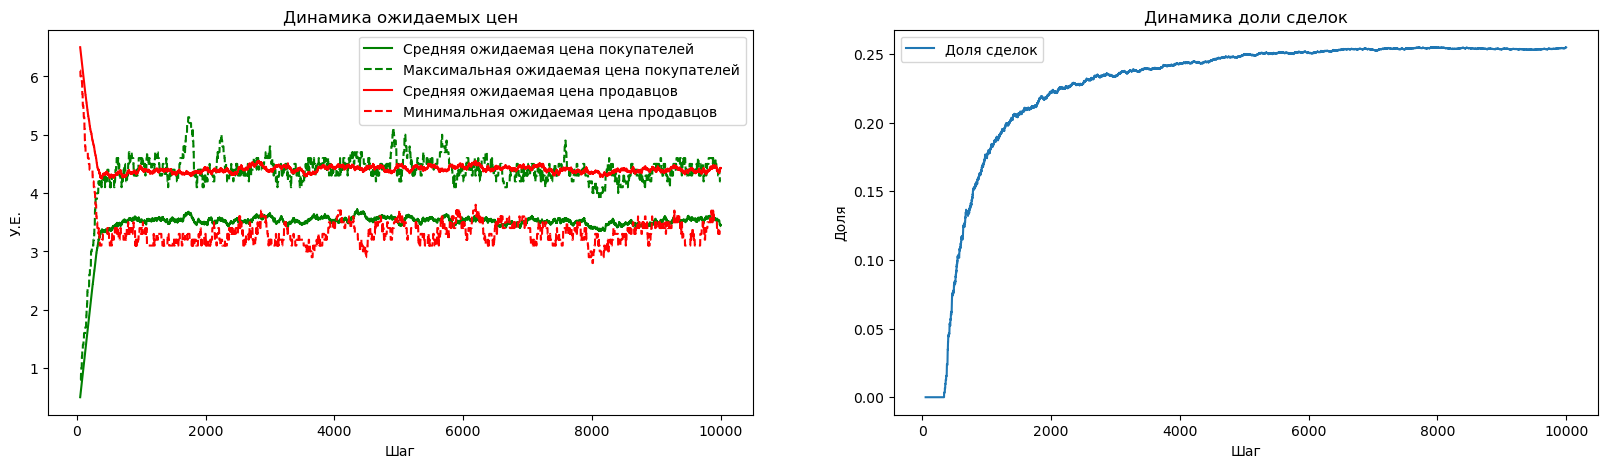

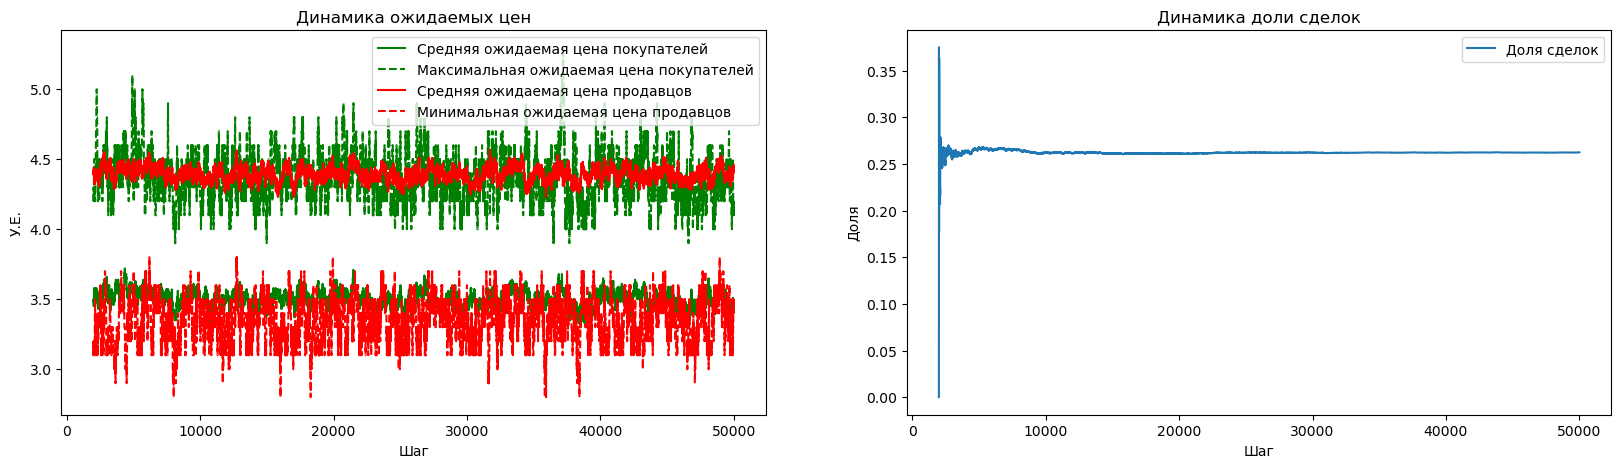

In [156]:
model.plot_dynamics(0, 10)
model.plot_dynamics(20, 30)
model.plot_dynamics(50, 2000)
model.plot_dynamics(2000, 10000)

1. В отличие от базовой модели, здесь мы устраиваем взаимодействие так, чтобы каждый из агентов примерно равномерно принимал участие в сделках. Доля успешных сделок будет такой же, как и в базовой модели(это достаточно интуитивно, так в исходной модели для любых симуляций доля успешных сделок сходилась к какому-то числу, определенному параметрами модели, а в нынешней ситуации мы по сути рассматриваем некоторое меньшее множество симуляций базовой модели => доля сделок будет сходиться к тому же числу).
2. При достаточно больших значениях maxcollections скорость сходимости уменьшается. Вероятно, это вызвано тем, что мы накладываем ограничения на торговлю, что мешает рынку стабилизироваться.
3. Динамика максимальных цен стала более гладкой(при maxcollections > 1). Это объясняется тем, что теперь менее вероятно существование человека, который принимал участие в малом количестве сделок и ещё не скорректировал свои ожидания, и как следствие имеет сильно отличающуюся ожидаемую цену. 
4. В данной модели доля сделок фактически монотонно возрастает, а потом стабилизируется,  что достаточно хорошо для реального рынка(у продавцов и покупателей больше определенности относительно будущего, в то время как в обычной модели график доли сделок достаточно сильно колебался, что в реальной жизни уменьшает привлекательность рынка для обычных агентов, а не спекулянтов). Интересно то, что это по сути реальный способ борьбы с спекулянтами: Большинство компаний, производящих брендовые кроссовки на первых распродажах новой партии обуви не продают больше одной пары в одни руки.


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.



1. Добавим в нашу модель государство, оно будет забирать с каждой успешной сделки t денежных единиц с каждого агента. Задача вывести равновесную долю сделок в зависимости от t, а потом найти ставку t, при которой налоговые сборы(на самом деле величина $t*d$, где d - равновесная доля сделок) максимальна.

2. Поиск доли сделок в зависимости от налога очевиден: Просто уменьшаем максимальные цены для всех покупателей на величину налога, и также увеличиваем минимальные цены для всех продавцов на величину налога. Затем запускаем модель.

3. Теперь займемся максимизацией налоговых сборов:
     Есть два подхода к решению данной задачи: 
     
     Первый заключается в переборе решения начиная от 0 до $|c.maxprice - s.minprice|$(при большей ставке налога, налоговые сборы очевидно равны нулю), c шагом равной наименьшей из дельт для покупателей и продавцов(погрешность будет достаточно маленькой).
     
    Второй подход - различные приближенные решения, с значительно большей погрешностью(у данной модели скорее всего нет строгого, быстроработющего аналитического решения).
    
    Я решил использовать первый подход, так как он к тому же дает возможность строить кривую лаффера(достаточно хранить записанные значения в массиве, а потом его визуализировать).
    
    Задачу будем решать при таких ограничениях: Кол-во продавцов и покупателей не превосходит 100, правые точки отрезков, на которых генерируются цены <=10, и дельты продавцов и покупателей >=0.1.(В ином случае модель будет сходиться к равновесному уровню сделок очень долго).


4. Теперь о реализации:
    Добавим метод tax_share, который принимает на вход self и ставку налога t. Затем сделаем достаточно большое кол-во шагов(при не очень больших длинах отрезков, на которых генерируются цены, это примерно квадрат от максимума среди покупателей и продавцов) при данной ставке налога и выведем ответ.

    Также мы можем построить красивые графики:

    Метод plot_taxgraph рисует две зависимости:
    
    1.Зависимость нормированных налоговых сборов от ставки налога
    
    2.Зависимость доли сделок от ставки налога

    Также, этот метод возвращает оптимальную ставку налога, и уменьшение доли сделок в процентах при оптимальной ставке налога относительно ситуации, когда налога нет.

In [157]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta,deals=0):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            deals -- кол-во сделок, которое было совершено

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.consumer_max = consumer_max
        self.seller_min = seller_min
        self.consumer_delta = consumer_delta
        self.seller_delta = seller_delta

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []
        self.deals = 0


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            self.deals +=1;
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
        return self.deals/num_of_steps;
    def tax_share(self, t):
        b = copy.deepcopy(self)
        for i in range(b.num_of_consumers):
            b.consumers[i].max_price -= t;
        for i in range(b.num_of_sellers):
            b.sellers[i].min_price += t;
        e = copy.deepcopy(b.run(9*max(b.num_of_consumers, b.num_of_sellers, 100) * max(b.num_of_consumers, b.num_of_sellers)))
        return [t, e*t, e]
    def tax_vec(self, t_min, t_max):
        delta = min(self.consumer_delta, self.seller_delta)
        vec = []
        while(t_min <= t_max):
            vec.append(self.tax_share(t_min))
            t_min += delta
        return vec
    def plot_taxgraph(self):
        t_min = 0
        t_max = self.consumer_max - self.seller_min
        x = self.tax_vec(t_min, t_max)
        a = []
        b = []
        c = []
        tax = 0
        maxs = 0
        share = 0
        for i in range(len(x)):
            if(x[i][1] > maxs):
                maxs = x[i][1]
                tax = x[i][0]
                share = x[i][2]
            a.append(x[i][0])
            b.append(x[i][1])
            c.append(x[i][2])
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        ax1.title.set_text("Кривая Лаффера")
        ax1.plot(a, b, label = "Кривая Лаффера")
        ax1.legend()
        ax1.set_xlabel("Ставка налога")
        ax1.set_ylabel("Нормированные налоговые сборы")
        ax1.scatter(tax, maxs, color = "red")
        ax1.annotate("Оптимум", xy = (tax, maxs))
        ax2.title.set_text("Зависимость доли сделок от налога")
        ax2.plot(a, c, label = "Зависимость доли сделок от налога")
        ax2.legend()
        ax2.set_xlabel("Ставка налога")
        ax2.set_ylabel("Доля успешных сделок")
        ax2.scatter(tax,share, color = "red")
        ax2.annotate("Точка максимума налоговых сборов", xy = (tax, share))
        return [tax, 100*(x[0][2] - share)/x[0][2]]
    def get_max(self):
        t_min = 0
        t_max = self.consumer_max - self.seller_min
        x = self.tax_vec(t_min, t_max)
        tax = 0
        maxs = 0
        share = 1
        for i in range(len(x)):
            if(x[i][1] > maxs):
                maxs = x[i][1]
                tax = x[i][0]
                share = x[i][2]
        return [tax, 100*(x[0][2] - share)/x[0][2]]
        
class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



100%|██████████| 45001/45001 [00:00<00:00, 120844.04it/s]


0.8999999999999999 -- оптимальная ставка налога
43.68480940641002 -- уменьшение доли сделок в процентах при оптимальной ставке налога


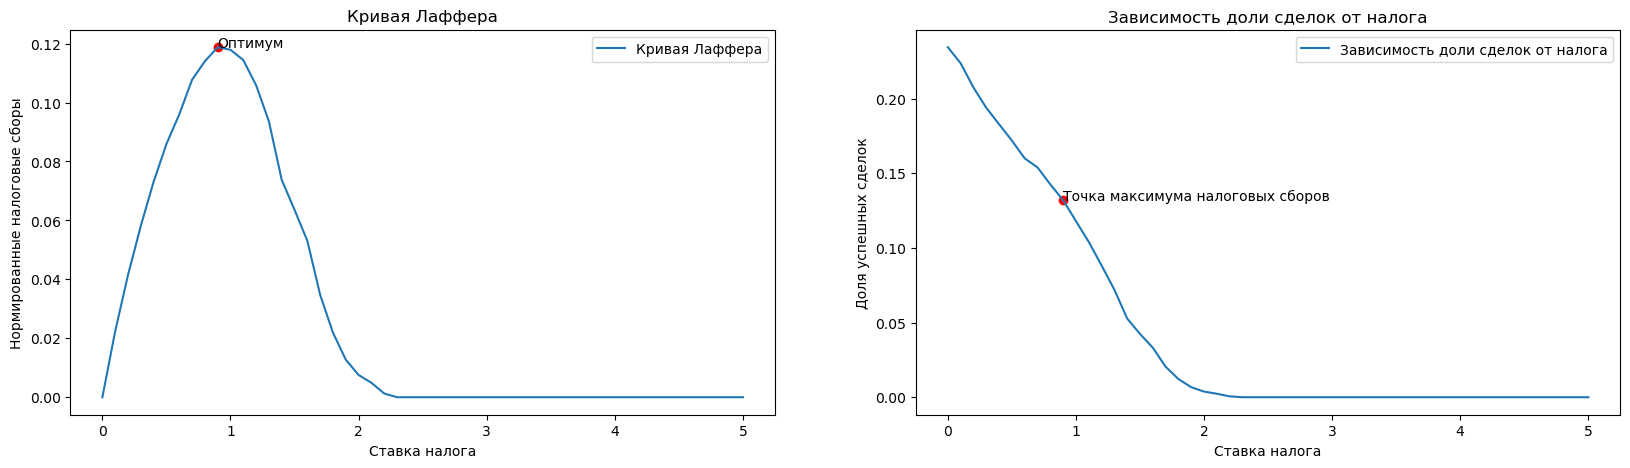

In [158]:
model = Model(num_of_consumers=50,
              num_of_sellers=50,
              consumer_min=1,
              consumer_max=7,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=6,
              seller_delta=0.1)
# Рисуем кривую лаффера и выводим ответ
x = model.plot_taxgraph()
print(x[0],'--','оптимальная ставка налога')
print(x[1], '--','уменьшение доли сделок в процентах при оптимальной ставке налога' )

1. Экономическая интерпретация:

    На самом деле, данная модель не показала каких-то неожиданных результатов:

    Несмотря на очень сложное взаимодействие между большими группами агентов, кривая лаффера для них очень похожа на классическую и сохраняет почти все ее хорошие свойства(подробнее об этом я скажу в следующем разделе).
    Доля успешных сделок уменьшалась примерно в два раза, что достаточно близко к ситуации, когда спрос и предложение линейны(тогда кол-во реализуемого товара уменьшается ровно в два раза).
    Зависимость доли сделок от налога при больших кол-вах продавцов и покупателей мало отличается от линейной, что позволяет получить быстрое приближенное решение для моделей, которые не вписываются в описанные мной ограничения: Достаточно просто запустить модель при двух различных ставках налога, лежащий на отрезке $[0, |c.maxprice - s.minprice|]$, восстановить по ним зависимость доли сделок от ставки налога, а потом изобразить кривую лаффера для линейной функции.


2. Математическое замечание:

    Визуализация кривой лаффера показала очень интересную закономерность: Функция $T(t)$, где t - ставка налога, а T - налоговые сборы для данной модели очень сильно напомниает параболу ветвями вниз, но что более важно, она достаточно точно сохраняет ее важнейшее свойство: Функция монотонно возрастает до оптимума, и монотонно убывает после. Это значит, что мы можем оптимизировать решение эвристикой, которая позволит мне искать решение не за $O(n^{2} * \frac{|c.maxprice - s.minprice|}{delta})$, где $n$ - это кол-во шагов, которое мы моделируем, а $\frac{|c.maxprice - s.minprice|}{delta}$ - кол-во значений t, которые мы переберем, а за $O(n^{2} * \log{\frac{|c.maxprice - s.minprice|}{delta}})$(В случае если нужно найти ТОЛЬКО максимум налоговых сборов, а не визуализировать кривую лаффера целиком).

    Суть эвристики заключается в следующем:
    
    Берем концы отрезка($[a,b]$) на котором потенциально лежит решение, берем середину этого отрезка $\frac{a+b}{2}$. Берем достаточно близкое к нему значение справа. Если налоговые сборы в той точке больше, то оптимальное решение находится на отрезке $[\frac{a+b}{2}, b]$, иначе, на отрезке $[a,\frac{a+b}{2}]$. Продолжаем проводить эту операцию, пока $|a-b| > delta$, иначе заканчиваем поиск и выдаем в качестве ответа $\frac{a+b}{2}$.

    На самом деле, это очень существенная оптимизация, и она может очень сильно ускорить поиск оптимального решения при $delta << |c.maxprice - s.minprice|$.

    Выходит, что мы можем быстро получать приближенные решения как и при больших кол-вах продавцов и покупателей, так и при достаточно больших отрезках распределения цен. Это имеет достаточно большой практический смысл, так как в реальной жизни регулятор не может искать решение обычным перебором, в силу очень большого кол-ва агетов на рынке.